# Project: Wrangling and Analyze Data

# Table of Contents
 1. [Data Gathering](#data_gathering)
 2. [Assessing Data](#data_assessment) <br>
     2.1 [Visual Assessment](#visual_assessment) <br>
     2.2 [Programmatic Assessment](#prog_assessment) <br>
     2.3 [Results from Data Assessment](#results)
 3. [Cleaning Data](#data_cleaning) <br>
     3.1 [Filter out retweets data](#quality_issue1) <br>
     3.2 [Filter out replies data](#quality_issue2) <br>
     3.3 [Drop all NaN columns](#quality_issue3) <br>
     3.4 [Convert data type](#quality_issue4) <br>
     3.5 [Rename column](#quality_issue5) <br>
     3.6 [Replace None with NaN](#quality_issue6) <br>
     3.7 [Remove outliers](#quality_issue7_8) <br>
     3.8 [Melt column and remove duplicates](#tidiness_issue1) <br>
     3.9 [Merge dataframes](#tidiness_issue2)
 4. [Storing Data](#data_storing)
 5. [Analyzing and Visualizing Data](#analyze_visualize) <br>
     5.1 [Research Question 1](#rq1) <br>
     5.2 [Research Question 2](#rq2) <br>
     5.3 [Research Question 3](#rq3) <br>
     5.4 [Insights](#insights)
     

In [385]:
# install tweepy
!pip install tweepy

## Load packages
Import all the packages required for this project

In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import tweepy 
import json
import time

<a id="data_gathering"></a>
## Data Gathering
In this section, I am gathering **all** three pieces of data for this project and load them in the notebook. The methods required to gather each data are as follows:
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# read data into pandas dataframe
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# define url to download from and connect to it
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [4]:
# save the last part of the url as file name
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [5]:
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [19]:
# API keys and tokens
consumer_key = 'Removed'
consumer_secret = 'Removed'
access_token = 'Removed'
access_secret = 'Removed'

In [ ]:
# set up authentication access to api
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive_df.tweet_id.values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = time.time()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json3.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = time.time()
print(end - start)
print(fails_dict)

In [ ]:
len(fails_dict)

In [6]:
# declare empty list to hold attributes of dataframe
df_list = []

# Read file line by line to create dataframe
with open('tweet_json.txt') as f:
    for line in f:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        df_list.append(
            {'tweet_id':tweet_id,
            'retweet_count':retweet_count,
            'favorite_count':favorite_count}
        )
tweets_count_df = pd.DataFrame(df_list, columns=['tweet_id','retweet_count','favorite_count'])

In [7]:
tweets_count_df.shape

(1774, 3)

<a id="data_assessment"></a>
## Assessing Data
In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. I will use **both** visual assessment
programmatic assessement to assess the data.


<a id="visual_assessment"></a>
### Visual Assessment
In this section, I will attempt to check the dataframe line by line for quality or tidiness issues. Since pandas collapses most of the rows for large datasets, I will also use an external application e.g Ms Excel to view the data.

In [62]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
tweets_count_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33696
1,892177421306343426,5272,29222
2,891815181378084864,3464,21978
3,891689557279858688,7191,36791
4,891327558926688256,7717,35183
...,...,...,...
1769,667766675769573376,185,371
1770,667728196545200128,126,323
1771,667724302356258817,267,422
1772,667550904950915073,28,0


<a id="prog_assessment"></a>
### Programmatic Assessment
Here, I will use pandas' functions or methods to check for quality issues about the data

In [11]:
# first dataframe
# display a concise summary of data
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# frequency of dog names
twitter_archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [13]:
# unique names of dogs
twitter_archive_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [14]:
# summary statistics
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [15]:
# random samples of 5 observations
twitter_archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
958,751456908746354688,NaN,NaN,2016-07-08 16:44:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper that's very hungry but too laz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/751456908...,12,10,None,None,None,pupper,None
1990,672640509974827008,NaN,NaN,2015-12-04 04:56:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Leonidas. He just got rekt by a snowba...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672640509...,9,10,Leonidas,None,None,None,None
983,749395845976588288,NaN,NaN,2016-07-03 00:14:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is George. He just remembered that bees a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749395845...,10,10,George,None,None,None,None
974,750056684286914561,NaN,NaN,2016-07-04 20:00:23 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Jameson. He had a few too many in the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750056684...,11,10,Jameson,None,None,None,None
1401,699434518667751424,NaN,NaN,2016-02-16 03:25:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I know this is a tad late but here's a wonderf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699434518...,12,10,None,None,None,pupper,None


In [16]:
# check for duplicate rows
np.sum(twitter_archive_df.duplicated())

0

In [17]:
# second dataframe
# concise summary
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# summary statistics
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
# random samples of 5 observations
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
234,670421925039075328,https://pbs.twimg.com/media/CU3RLqfW4AE0pbA.jpg,1,Chihuahua,0.275793,True,corn,0.073596,False,bolete,0.054905,False
722,686003207160610816,https://pbs.twimg.com/media/CYUsRsbWAAAUt4Y.jpg,1,damselfly,0.190786,False,common_newt,0.098131,False,whiptail,0.088958,False
1212,743210557239623680,https://pbs.twimg.com/media/ClBqDuDWkAALK2e.jpg,1,golden_retriever,0.930705,True,Chesapeake_Bay_retriever,0.025934,True,Labrador_retriever,0.007535,True
1284,750506206503038976,https://pbs.twimg.com/media/CmpVaOZWIAAp3z6.jpg,1,American_black_bear,0.219166,False,lesser_panda,0.214715,False,titi,0.091685,False
1919,855851453814013952,https://pbs.twimg.com/media/C-CYWrvWAAU8AXH.jpg,1,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True


In [20]:
# check for duplicate rows 
np.sum(image_predictions_df.duplicated())

0

In [21]:
# Third dataframe
# concise summary
tweets_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1774 non-null   int64
 1   retweet_count   1774 non-null   int64
 2   favorite_count  1774 non-null   int64
dtypes: int64(3)
memory usage: 41.7 KB


In [22]:
# summary statistics
tweets_count_df.describe()

,tweet_id,retweet_count,favorite_count
count,1.774000e+03,1774.000000,1774.000000
mean,7.489605e+17,2664.073281,7750.222097
std,7.503529e+16,4097.728364,11366.610569
min,6.675509e+17,1.000000,0.000000
25%,6.766042e+17,481.500000,1111.250000
50%,7.020994e+17,1314.000000,2901.500000
75%,8.175279e+17,3188.000000,10434.500000
max,8.924206e+17,51426.000000,123687.000000


In [23]:
# random samples of 5 observations
tweets_count_df.sample(5)

,tweet_id,retweet_count,favorite_count
611,794205286408003585,3102,8746
1291,677895101218201600,1836,4383
425,819347104292290561,1115,6810
1667,669625907762618368,1560,3108
1575,671163268581498880,965,1455


<a id="results"></a>
### Results from Data Assessment
### Quality issues
twitter_archive_df
1. retweets are unnecessary data in the dataset - retweeted_status_id, retweeted_status_user_id, and       retweeted_status_timestamp columns
2. replies are also unnecessary data in the dataset - in_reply_to_status_id and in_reply_to_user_id columns

3. Columns with all null values are uesless

4. wrong datatype for timestamp column; object instead of datetime

5. name column is less descriptive; name instead of dog_name

6. Missing dog names represented as None

tweets_count_df

7. Possible presence of outliers with the retweet_count column

8. Possible presence of outliiers with the favorite_count column

 

### Tidiness issues
1. values of dog_stage (pupper, puppo, doggo, floofer) as column headers in twitter_archive_df dataframe

2. twitter_archive_df and tweets_count_df are data from same observational units (tweets)

<a id="data_cleaning"></a>
## Cleaning Data
In this section,  I will clean **all** of the issues I documented above while assessing the datasets. 

I begin by making a copy of the original data before cleaning.

In [343]:
# copies of original pieces of data
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
tweets_count_clean = tweets_count_df.copy()

<a id="quality_issue1"><a/>
### Quality Issue #1:

#### Define:
Filter out retweets data to drop the retweet columns (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**) 

#### Code

In [344]:
# filter dataset where retweeted_status_id are NaNs
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()].reset_index().drop('index',
                                                                                                               axis=1)

#### Test

In [345]:
# concise summary  of the cleaned dataframe
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

In [346]:
# number of retweets rows filtered out
twitter_archive_df.shape[0] - twitter_archive_clean.shape[0]

181

<a id="quality_issue2"><a/>
### Quality Issue #2:

#### Define
Filter out replies data to drop the columns (**in_reply_to_status_id and in_reply_to_user_id**)

#### Code

In [347]:
# Filter data where in_reply_to_status_id is are NaNs
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()].reset_index().drop('index',
                                                                                                                      axis=1)

#### Test

In [348]:
# concise summary of the cleaned dataframe
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [349]:
# number of replies rows filtered out
twitter_archive_df.shape[0] - twitter_archive_clean.shape[0] - 181

78

<a id="quality_issue3"><a/>
### Quality Issue #3:

### Define
Drop columns with all null values

### Code

In [350]:
# define columns to drop
columns_to_drop = ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id']
# drop columns
twitter_archive_clean.drop(columns_to_drop,axis=1, inplace=True)

### Test

In [351]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   doggo               2097 non-null   object
 9   floofer             2097 non-null   object
 10  pupper              2097 non-null   object
 11  puppo               2097 non-null   object
dtypes: int64(3), object(9)
memory usage: 196.7+ KB


<a id="quality_issue4"><a/>
### Quality Issue #4:

### Define
Convert the datatype of the timestamp column to datetime

### Code

In [352]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

### Test

In [353]:
twitter_archive_clean.timestamp.dtype

datetime64[ns, UTC]

<a id="quality_issue5"><a/>
### Quality Issue #5:

### Define
Rename the name column to dog_name

### Code

In [354]:
twitter_archive_clean = twitter_archive_clean.rename(columns={'name':'dog_name'})

### Test

In [355]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

<a id="quality_issue6"></a>
### Quality Issue #6:

### Define
Replace None with NaN for missing dog names

### Code

In [356]:
twitter_archive_clean.dog_name = twitter_archive_clean.dog_name.replace('None', np.nan)

In [357]:
twitter_archive_clean.dog_name.value_counts(dropna=False)

NaN           603
a              55
Lucy           11
Charlie        11
Oliver         10
             ... 
Lenox           1
Harvey          1
Blanket         1
Burt            1
Christoper      1
Name: dog_name, Length: 955, dtype: int64

<a id="quality_issue7_8"></a>
### Quality Issue #7-8:

### Define
Remove outliers using standard deviations

### Code

In [358]:
# define function to remove outliers
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

# remove outliers that lie more than 3 standard deviations away from the mean
tweets_count_clean = remove_outliers(tweets_count_clean, ['retweet_count','favorite_count'], 2)

Working on column: retweet_count
Working on column: favorite_count


### Test

In [359]:
tweets_count_clean.describe()

,tweet_id,retweet_count,favorite_count
count,1.603000e+03,1603.000000,1603.000000
mean,7.397018e+17,1745.530256,5175.740487
std,7.095980e+16,1793.192742,5669.078241
min,6.675509e+17,1.000000,0.000000
25%,6.754991e+17,439.000000,1004.000000
50%,6.964060e+17,1070.000000,2491.000000
75%,8.040936e+17,2578.500000,8186.000000
max,8.918152e+17,10832.000000,22392.000000


In [360]:
tweets_count_clean.shape

(1603, 3)

<a id="tidiness_issue1"><a/>
### Tidiness Issue #1:

### Define
Melt the pupper, puppo, doggo and floofer columns to a dog_stage column and remove duplicate rows

In [361]:
twitter_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'doggo',
       'floofer', 'pupper', 'puppo'],
      dtype='object')

### Code

In [362]:
twitter_archive_clean = pd.melt(twitter_archive_clean, 
        id_vars=['tweet_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','dog_name'],
        var_name='dog_stage', value_name='dog_breed')


In [364]:
# remove duplicate tweet_ids
twitter_archive_clean.drop_duplicates(subset=['tweet_id','dog_breed'] ,inplace=True)

### Test

In [365]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,dog_breed
965,718971898235854848,2016-04-10 01:20:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She is prepared for battle. 10/...,https://twitter.com/dog_rates/status/718971898...,10,10,Sadie,doggo,None
4643,800459316964663297,2016-11-20 22:02:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very sleepy pupper. Appears to be por...,https://twitter.com/dog_rates/status/800459316...,12,10,NaN,pupper,pupper
1366,686050296934563840,2016-01-10 05:01:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio. He's a Macedonian Poppycock. 9...,https://twitter.com/dog_rates/status/686050296...,11,10,Flávio,doggo,None
112,867051520902168576,2017-05-23 16:16:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Oh my this spooked me up. We only rate dogs, n...",https://twitter.com/dog_rates/status/867051520...,13,10,NaN,doggo,None
649,766793450729734144,2016-08-20 00:26:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Rufus. He just missed out on the 100m ...,https://twitter.com/dog_rates/status/766793450...,10,10,Rufus,doggo,None


In [386]:
# Further cleaning of twitter_archive_clean dataframe - replace the None with NaN values in the dog_breed column
twitter_archive_clean.dog_breed = twitter_archive_clean.dog_breed.replace('None', np.nan)
# check the result
twitter_archive_clean.dog_breed.value_counts(dropna=False)

NaN        2097
pupper      230
doggo        83
puppo        24
floofer      10
Name: dog_breed, dtype: int64

<a id="tidiness_issue2"><a/>
### Tidiness Issue #2:

### Define 
Merge the 3 dataframes into the master dataframe

### Code

In [368]:
master_df = twitter_archive_clean.merge(image_predictions_df, on='tweet_id').merge(tweets_count_clean, on='tweet_id')

### Test

In [369]:
# list first 2 rows
master_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_name,dog_stage,dog_breed,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,doggo,NaN,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3464,21978
1,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,doggo,NaN,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2586,17749


In [370]:
# concise summary of master dataset
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1537 entries, 0 to 1536
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1537 non-null   int64              
 1   timestamp           1537 non-null   datetime64[ns, UTC]
 2   source              1537 non-null   object             
 3   text                1537 non-null   object             
 4   expanded_urls       1537 non-null   object             
 5   rating_numerator    1537 non-null   int64              
 6   rating_denominator  1537 non-null   int64              
 7   dog_name            1127 non-null   object             
 8   dog_stage           1537 non-null   object             
 9   dog_breed           208 non-null    object             
 10  jpg_url             1537 non-null   object             
 11  img_num             1537 non-null   int64              
 12  p1                  1537 non-null 

In [378]:
np.sum(master_df.duplicated())

0

In [379]:
master_df.shape

(1537, 24)

<a id="data_storing"></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [380]:
master_df.to_csv('twitter_archive_master.csv', index=False)

<a id="analyze_visualize"></a>
## Analyzing and Visualizing Data
In this section, I will analyze and visualize my wrangled data based on research questions. You must produce at least **three (3) insights and one (1) visualization.**

<a id="rq1"></a>
### Research Question 1: What is the average retweet count of the dog breeds from year to year?

In [381]:
# create the year column
master_df['year'] = master_df.timestamp.dt.year

# filter the dataframe for each of the dog breeds    
doggo = master_df.query('dog_breed == "doggo"')
pupper = master_df.query('dog_breed == "pupper"')
puppo = master_df.query('dog_breed == "puppo"')
floofer = master_df.query('dog_breed == "floofer"')
unknown = master_df[master_df.dog_breed.isnull()]

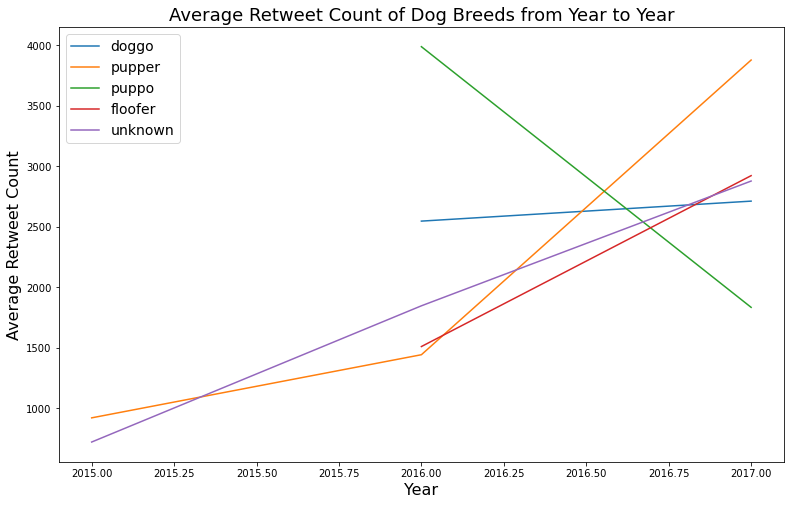

In [382]:
# line plot for the dog breeds' average retweet count from year to year
doggo.groupby('year')['retweet_count'].mean().plot(kind='line', label='doggo', figsize=(13,8))
pupper.groupby('year')['retweet_count'].mean().plot(kind='line', label='pupper')
puppo.groupby('year')['retweet_count'].mean().plot(kind='line', label='puppo')
floofer.groupby('year')['retweet_count'].mean().plot(kind='line', label='floofer')
unknown.groupby('year')['retweet_count'].mean().plot(kind='line', label='unknown')
plt.title('Average Retweet Count of Dog Breeds from Year to Year', fontsize=18)
plt.ylabel('Average Retweet Count', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(fontsize=14)
plt.show()


<a id="rq2"></a>
### Research Question 2: What is the average favorite count of the dog breeds from year to year?

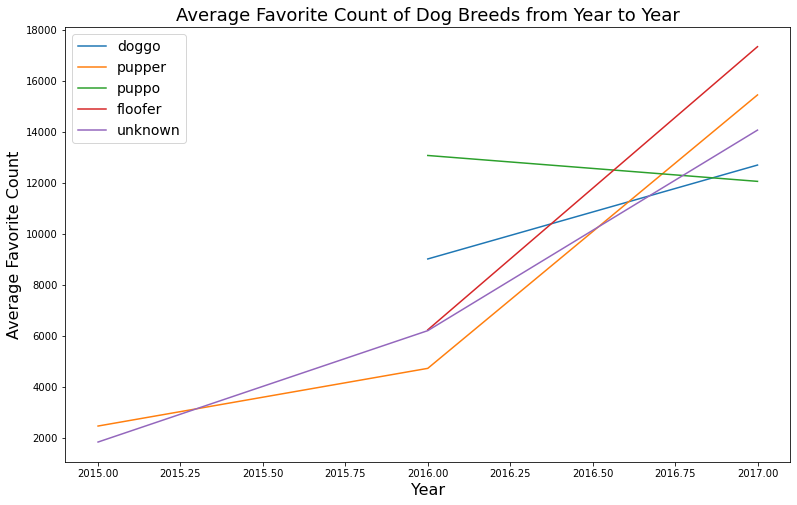

In [383]:
# line plot for the dog breeds' average favorite count from year to year
doggo.groupby('year')['favorite_count'].mean().plot(kind='line', label='doggo', figsize=(13,8))
pupper.groupby('year')['favorite_count'].mean().plot(kind='line', label='pupper')
puppo.groupby('year')['favorite_count'].mean().plot(kind='line', label='puppo')
floofer.groupby('year')['favorite_count'].mean().plot(kind='line', label='floofer')
unknown.groupby('year')['favorite_count'].mean().plot(kind='line', label='unknown')
plt.title('Average Favorite Count of Dog Breeds from Year to Year', fontsize=18)
plt.ylabel('Average Favorite Count', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.legend(fontsize=14)
plt.show()

<a id="rq3"></a>
### Research Question 3: What is the correlation between retweet_count and favorite_count?

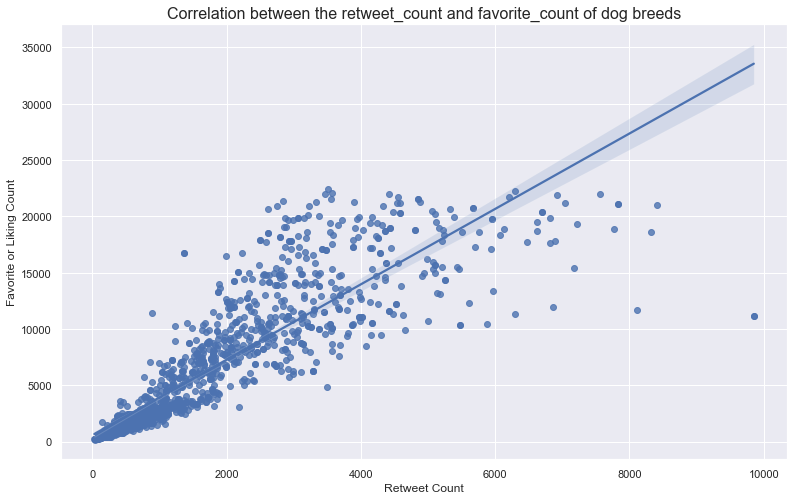

In [392]:
sns.set_theme(color_codes=True)
plt.figure(figsize=(13,8))
sns.regplot(x='retweet_count', y='favorite_count', data=master_df)
plt.title('Correlation between the retweet_count and favorite_count of dog breeds', fontsize=16)
plt.ylabel('Favorite or Liking Count')
plt.xlabel('Retweet Count')
plt.show()

<a id="insights"></a>
### Insights:
1. The retweet and favorite counts of doggo, puppo and floofer breed of dogs began in 2016, whereas that for pupper began in 2015.

2. As from 2016, the retweet and favorite counts of doggo, pupper and floofer breed of dogs increases, whereas that for puppo decreases.

3. pupper and floofer seems to be the most favorite breeds of dogs over the years.

4. Since both retweet and favorite counts for pupper and the unknown breed of dogs begin in 2015, one could substitute or replace pupper for the unknown breed of dogs

5. There is a positive correlation between retweet_count and favorite_count. That is, when the retweet_count of the dog breeds increases, the favorite_count also increases.